<a href="https://colab.research.google.com/github/apchavezr/VISUALIZACION_DATOS_TOMA-DECISIONES/blob/main/Visualizacion_IPC_Colombia_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos: Ejemplo práctico con IPC en Colombia

Este notebook tiene como propósito ilustrar cómo usar Python para representar datos simulados del IPC (Índice de Precios al Consumidor) en Colombia.

A lo largo del ejercicio:
- Se generará un conjunto de datos simulados.
- Se organizará la información por fecha y categoría.
- Se realizarán visualizaciones con Matplotlib, Seaborn y Plotly.

👉 Este material es ideal para cursos de **Visualización de Datos para la Toma de Decisiones**.

In [1]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Paso 2: Crear un conjunto de datos simulado
Simularemos datos mensuales del IPC para cinco categorías entre 2019 y 2023.

In [8]:
# Generar datos simulados
np.random.seed(42)
fechas = pd.date_range(start='2019-01-01', end='2023-12-01', freq='MS')
categorias = ['Alimentos', 'Vivienda', 'Transporte', 'Salud', 'Educación']
data = {
    'Fecha': np.tile(fechas, len(categorias)),
    'Categoría': np.repeat(categorias, len(fechas)),
    'IPC': np.random.normal(loc=100, scale=10, size=len(fechas)*len(categorias))
}
df_ipc = pd.DataFrame(data)
df_ipc['IPC'] = df_ipc['IPC'].clip(lower=80, upper=130)
df_ipc.head()

,Fecha,Categoría,IPC
0,2019-01-01,Alimentos,104.967142
1,2019-02-01,Alimentos,98.617357
2,2019-03-01,Alimentos,106.476885
3,2019-04-01,Alimentos,115.230299
4,2019-05-01,Alimentos,97.658466


## Paso 3: Visualizar la tendencia promedio del IPC con Matplotlib y Seaborn

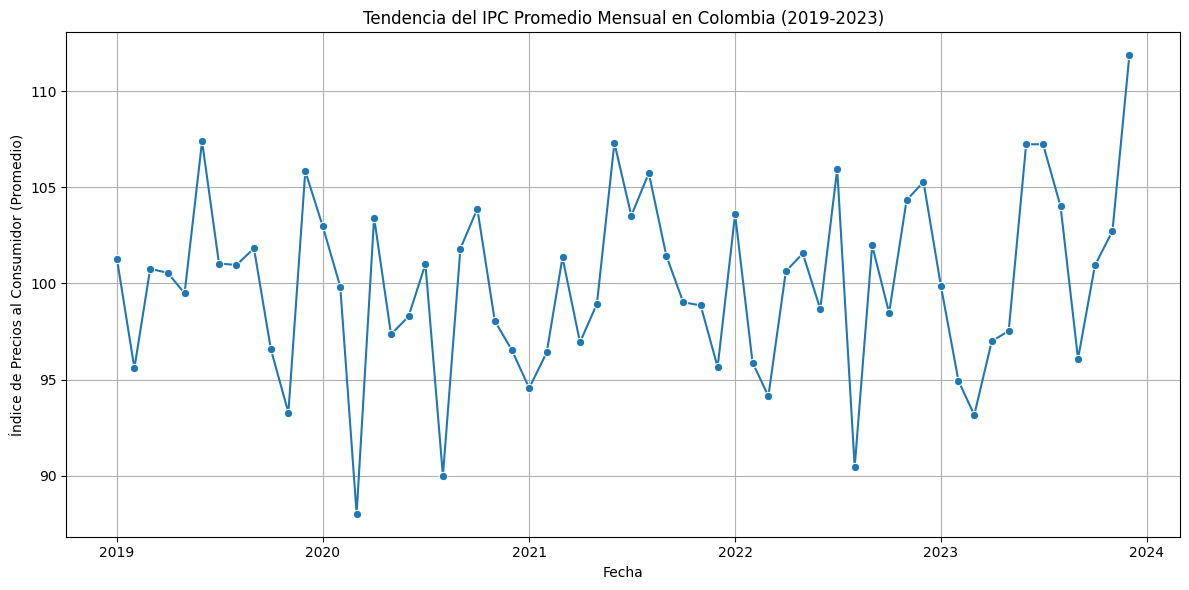

In [3]:
# Promedio mensual
df_summary = df_ipc.groupby('Fecha')['IPC'].mean().reset_index(name='IPC Promedio')

# Gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_summary, x='Fecha', y='IPC Promedio', marker='o')
plt.title('Tendencia del IPC Promedio Mensual en Colombia (2019-2023)')
plt.xlabel('Fecha')
plt.ylabel('Índice de Precios al Consumidor (Promedio)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Paso 4: Visualización interactiva con Plotly por categoría

In [4]:
fig = px.line(df_ipc, x='Fecha', y='IPC', color='Categoría',
              title='Evolución del IPC por Categoría (2019-2023)',
              labels={'IPC': 'Índice de Precios al Consumidor', 'Fecha': 'Fecha'},
              markers=True)
fig.update_layout(legend_title_text='Categoría',
                  xaxis=dict(tickformat='%Y-%m'),
                  hovermode='x unified')
fig.show()

## Paso 5: Análisis de evolución del IPC por categoría
En esta sección se realiza un análisis detallado con base en el conjunto de datos simulado del IPC.

### Pregunta 1: ¿Qué categoría tiene el mayor IPC promedio?

In [5]:
# Calcular el IPC promedio por categoría
promedios_categoria = df_ipc.groupby('Categoría')['IPC'].mean().reset_index()
promedios_categoria.sort_values(by='IPC', ascending=False)

,Categoría,IPC
3,Transporte,100.919143
2,Salud,100.430211
4,Vivienda,100.066457
1,Educación,100.025546
0,Alimentos,98.453453


🔍 **Interpretación:**
La tabla anterior muestra el promedio del IPC para cada categoría. La categoría con el valor más alto se interpreta como aquella que ha tenido mayor presión inflacionaria en promedio entre 2019 y 2023.

### Pregunta 2: ¿Se identifican picos o caídas inusuales en algún mes o año?

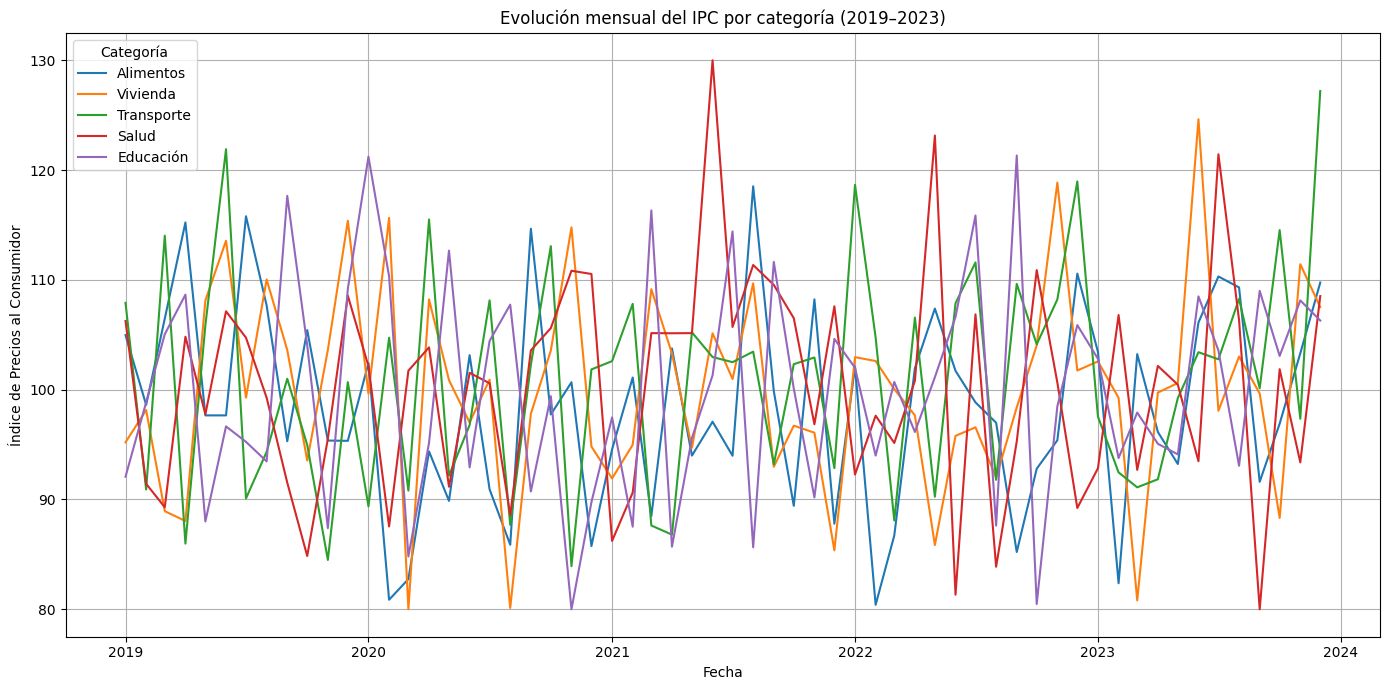

In [7]:
# Gráfico de línea por categoría
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_ipc, x='Fecha', y='IPC', hue='Categoría')
plt.title('Evolución mensual del IPC por categoría (2019–2023)')
plt.xlabel('Fecha')
plt.ylabel('Índice de Precios al Consumidor')
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 **Interpretación:**
Observe si alguna categoría presenta picos altos o caídas abruptas. Esto puede indicar un evento particular que afectó los precios en esa categoría durante ese período.

### Pregunta 3: ¿Cómo cambiaría la interpretación si se usa un gráfico de torta en lugar de uno de barras?

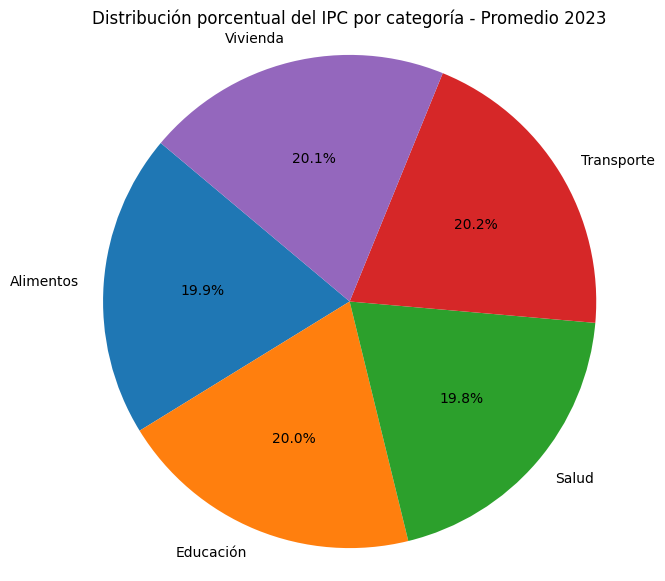

In [6]:
# Promedio de IPC por categoría en 2023
df_2023 = df_ipc[df_ipc['Fecha'].dt.year == 2023]
prom_2023 = df_2023.groupby('Categoría')['IPC'].mean().reset_index()

# Gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(prom_2023['IPC'], labels=prom_2023['Categoría'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución porcentual del IPC por categoría - Promedio 2023')
plt.axis('equal')
plt.show()

🔍 **Interpretación:**
El gráfico de torta muestra proporciones relativas. Aunque es útil para representar participación, **no permite observar tendencias temporales ni comparar valores exactos con precisión**.
Por tanto, en análisis temporal o comparativo, es preferible un gráfico de barras o líneas.